# World Happiness & Germany Happiness 

## Part 1. Data Set Overview

## Contents
### 1. Data sets import, data overview
### 2. Data Cleaning
#### a.	Check for Missing Values: Identify and handle missing data.
#### b.	Check Data Types: Ensure numeric columns are correctly formatted.
#### c.	Standardize Column Names: Ensure consistency in column names across years.
#### d.	Remove Duplicates: Identify and remove duplicate entries.
#### e.	Handle Inconsistencies: Address any inconsistencies in country names or other categorical variables.
#### f. Merge the datasets
### 3. Data Understanding
#### a.	Review Variables: Understand the meaning of each variable (e.g., GDP per capita, social support, etc.).
#### b.	Descriptive Statistics: Calculate summary statistics (mean, median, standard deviation, etc.) for numeric variables.
#### c.	Visualize Distributions: Use histograms or boxplots to understand the distribution of key variables.
#### d.	Correlation Analysis: Explore 

### 1. Data sets import

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [6]:
# Shortcutpath
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'

In [7]:
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'

In [8]:
# Import 11 files 
yr2013 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2013.csv'), index_col = False)
yr2015 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2015.csv'), index_col = False)
yr2016 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2016.csv'), index_col = False)
yr2017 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2017.csv'), index_col = False)
yr2018 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2018.csv'), index_col = False)
yr2019 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2018.csv'), index_col = False)
yr2020 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2020.csv'), index_col = False)
yr2021 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2021.csv'), index_col = False)
yr2022 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2022.csv'), index_col = False)
yr2023 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'World Happiness Report 2023.csv'), index_col = False)
ir = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WorldHappinessIndex2013-2023.csv'), index_col = False)

### 2. Data Cleaning

In [10]:
# Check the yearly reports - the earliest report
yr2013.head()

,Country,Region,Ladder,Social Support,Freedom,Corruption,Donation,Generosity,Positive Affect,Negative Affect,Happiness (Yesterday),GDP per capita,Healthy life expectancy
0,Afghanistan,4,4.040,0.525,0.540,0.755,0.348,0.207,0.663,0.270,0.721,979.0,36.535
1,Albania,1,5.550,0.759,0.553,0.827,0.112,-0.192,0.627,0.276,0.568,7652.0,61.417
2,Algeria,8,5.422,0.831,0.551,0.681,0.106,-0.194,0.567,0.245,0.542,7547.0,61.722
3,Angola,9,5.589,0.723,0.584,0.912,0.322,0.046,0.659,0.361,0.708,5172.0,34.601
4,Argentina,6,6.562,0.906,0.764,0.810,0.199,-0.150,0.847,0.238,0.813,14379.0,65.543


In [11]:
# Check the last report
yr2023.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [12]:
# Check the report for 2015
yr2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
# Check the index report
ir.head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143.0
1,Singapore,2013,6.546,30.0
2,Comoros,2013,3.851,149.0
3,Sierra Leone,2013,4.318,127.0
4,Congo,2013,NaN,NaN


In [14]:
# Check the data set information. To avoid repetition, use a dictionary (datasets).
datasets = {
    "2013": yr2013,
    "2015": yr2015,
    "2016": yr2016,
    "2017": yr2017,
    "2018": yr2018,
    "2019": yr2019,
    "2020": yr2020,
    "2021": yr2021,
    "2022": yr2022,
    "2023": yr2023,
    "IR": ir
}

for year, df in datasets.items():
    print(f"Dataset for {year}:")
    df.info()
    print("\n" + "-"*50 + "\n")


Dataset for 2013:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  156 non-null    object 
 1   Region                   156 non-null    int64  
 2   Ladder                   156 non-null    float64
 3   Social Support           156 non-null    float64
 4   Freedom                  156 non-null    float64
 5   Corruption               156 non-null    float64
 6   Donation                 156 non-null    float64
 7   Generosity               156 non-null    float64
 8   Positive Affect          156 non-null    float64
 9   Negative Affect          156 non-null    float64
 10  Happiness (Yesterday)    156 non-null    float64
 11  GDP per capita           156 non-null    float64
 12  Healthy life expectancy  155 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 16.0+ KB

--

In [15]:
### a. Check for Missing Values
for year, df in datasets.items():
    print(f"Missing values in dataset for {year}:")
    print(df.isnull().sum())  # Count missing values per column
    print(f"Total missing values: {df.isnull().sum().sum()}")  # Count total missing values
    print("\n" + "-"*50 + "\n")


Missing values in dataset for 2013:
Country                    0
Region                     0
Ladder                     0
Social Support             0
Freedom                    0
Corruption                 0
Donation                   0
Generosity                 0
Positive Affect            0
Negative Affect            0
Happiness (Yesterday)      0
GDP per capita             0
Healthy life expectancy    1
dtype: int64
Total missing values: 1

--------------------------------------------------

Missing values in dataset for 2015:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Total missing values: 0

---

#### Observations
##### * As we can see there are very few missing values. In yr2013, yr2018, yr2019 per 1 missing value, in yr2023 - 3 missing values, in IR 294 missing values.
##### * The number of rows in all reports differs, what means that there are different numbers of participated countries through the years.
##### * The columns and column names in the yearly reports are different. Obviously because the methodology has improved over the years.
##### * However, the reports should be brought to one format bevor merging them.   
##### * Reports from 2013 to 2019 contain ranking column, the latest reports do not. The ranking column can be created and calculated based on ladder score each year separately.
##### * In the yearly report 2022 are missing most of the columns that are present in other reports.
##### * Some of reports have region column or regional indicator column, some of them do not. However the country column contains each data set. If needed regional parameter can be created separately.
##### * The "Explained by" columns are only present in the reports from 2020 onwards, it's not possible to do proper analysis on them. Hence, i would disregard these columns the analysis.
##### * The report for 2014 is missing, to achieve better visualization i decided to exclude also the data set from 2013.

### 2. Data Cleaning
#### b.	Check Data Types: Ensure numeric columns are correctly formatted.
##### All numeric columns have correct format: float&int

### 2. Data Cleaning
#### c.	Standardize Column Names: Ensure consistency in column names across years.
##### For consistency the columns names should be: 
##### * Country
##### * Region
##### * Year
##### * Happiness Rank
##### * Happiness Score
##### * Standard error of happiness score
##### * Lower confidence interval 
##### * Upper confidence interval   
##### * Logged GDP per capita
##### * Social support
##### * Healthy life expectancy
##### * Freedom to make life choices
##### * Perceptions of corruption
##### * Generosity
##### * Dystopia + residual

In [19]:
# Clean column names
def clean_column_names(columns):
    cleaned_columns = []
    for col in columns:
        # Remove special characters and replace spaces with underscores
        col = re.sub(r"[()\.\-]", "", col)  # Remove parentheses, dots, and hyphens
        col = col.strip().lower().replace(" ", "_")  # Convert to lowercase and replace spaces
        cleaned_columns.append(col)
    return cleaned_columns

# Apply to all datasets
for year, df in datasets.items():
    if year == 2013:  # Skip dataset for 2013
        continue
    print(f"\nStandardizing column names for year: {year}...")
    df.columns = clean_column_names(df.columns)
    datasets[year] = df
    print(f"Standardized columns for {year}:")
    print(df.columns)
    print("-" * 50)


Standardizing column names for year: 2013...
Standardized columns for 2013:
Index(['country', 'region', 'ladder', 'social_support', 'freedom',
       'corruption', 'donation', 'generosity', 'positive_affect',
       'negative_affect', 'happiness_yesterday', 'gdp_per_capita',
       'healthy_life_expectancy'],
      dtype='object')
--------------------------------------------------

Standardizing column names for year: 2015...
Standardized columns for 2015:
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual'],
      dtype='object')
--------------------------------------------------

Standardizing column names for year: 2016...
Standardized columns for 2016:
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'econom

In [20]:
# Centralized column mapping for all years
column_mapping = {
    2015: {
        "standard_error": "standard_error_of_happiness_score",
        "economy_gdp_per_capita": "gdp_per_capita",
        "family": "social_support",
        "health_life_expectancy": "healthy_life_expectancy",
        "freedom": "freedom_to_make_life_choices",
        "trust_government_corruption": "perceptions_of_corruption"
    },
    2016: {
        "economy_gdp_per_capita": "gdp_per_capita",
        "family": "social_support",
        "health_life_expectancy": "healthy_life_expectancy",
        "freedom": "freedom_to_make_life_choices",
        "trust_government_corruption": "perceptions_of_corruption",
    },
    2017: {
        "happinessrank": "happiness_rank",
        "happinessscore": "happiness_score",
        "whiskerhigh": "upper_confidence_interval", 
        "whiskerlow": "lower_confidence_interval",
        "economygdppercapita": "gdp_per_capita",
        "family": "social_support",
        "healthlifeexpectancy": "healthy_life_expectancy",
        "freedom": "freedom_to_make_life_choices",
        "trustgovernmentcorruption": "perceptions_of_corruption",
        "dystopiaresidual": "dystopia_residual"
    },
    2018: {
        "overall_rank": "happiness_rank",
        "country_or_region": "country",
        "score": "happiness_score",
        "gdp_per_capita": "gdp_per_capita",
        "social_support": "social_support"
    },
    2019: {
        "overall_rank": "happiness_rank",
        "country_or_region": "country",
        "score": "happiness_score",
    },
    2020: {
        "country_name": "country",
        "regional_indicator": "region",
        "ladder_score": "happiness_score",
        "standard_error_of_ladder_score": "standard_error_of_happiness_score",
        "upperwhisker": "upper_confidence_interval",
        "lowerwhisker": "lower_confidence_interval",
        "dystopia_+_residual": "dystopia_residual"
    },
    2021: {
        "country_name": "country",
        "regional_indicator": "region",
        "ladder_score": "happiness_score",
        "upperwhisker": "upper_confidence_interval",
        "lowerwhisker": "lower_confidence_interval",
        "dystopia_+_residual": "dystopia_residual"
    },
    2022: {
        "rank": "happiness_rank",
        "whiskerhigh": "upper_confidence_interval",
        "whiskerlow": "lower_confidence_interval",
        "dystopia_183_+_residual": "dystopia_residual",
    },
    2023: {
        "country_name": "country",
        "ladder_score": "happiness_score",
        "standard_error_of_ladder_score": "standard_error_of_happiness_score",
        "upperwhisker": "upper_confidence_interval",
        "lowerwhisker": "lower_confidence_interval",
        "dystopia_+_residual": "dystopia_residual"
    }
}

In [21]:
# Create helper function for renaming
def rename_and_transform(df, year, mapping):
    """
    Renames columns and applies transformations to the dataset based on the year.
    
    Parameters:
        df (pd.DataFrame): The dataset to process.
        year (int): The year of the dataset.
        mapping (dict): The centralized column mapping.
    
    Returns:
        pd.DataFrame: The processed dataset.
    """
    # Rename columns
    if year in mapping:
        df = df.rename(columns=mapping[year])
        for old_col in mapping[year].keys():
            if old_col not in df.columns:
                print(f"Column '{old_col}' not found in {year} dataset. Skipping.")
    else:
        print(f"No column mapping found for year {year}. Skipping renaming.")
    
    # Apply transformations
    if "gdp_per_capita" in df.columns:
        df["logged_gdp_per_capita"] = df["gdp_per_capita"].apply(np.log)
        df = df.drop(columns=["gdp_per_capita"])
    else:
        print(f"logged_gdp_per_capita' not found in {year} dataset. Skipping transformation.")
    
    if "standard_error_of_happiness_score" in df.columns and "happiness_score" in df.columns:
        df["lower_confidence_interval"] = df["happiness_score"] - 2 * df["standard_error_of_happiness_score"]
        df["upper_confidence_interval"] = df["happiness_score"] + 2 * df["standard_error_of_happiness_score"]
    else:
        print(f"Required columns for confidence intervals not found in {year} dataset. Skipping transformation.")
    
    if "happiness_score" in df.columns and year in [2020, 2021, 2023]:
        df["happiness_rank"] = df["happiness_score"].rank(method='min', ascending=False)
    elif "happiness_score" not in df.columns:
        print(f"Column 'happiness_score' not found in {year} dataset. Skipping ranking.")
    
    return df

In [22]:
# Apply the renaming & transformation
datasets = {
    2015: yr2015,
    2016: yr2016,
    2017: yr2017,
    2018: yr2018,
    2019: yr2019,
    2020: yr2020,
    2021: yr2021,
    2022: yr2022,
    2023: yr2023
}
# Rename columns and apply transformations for all datasets
for year, df in datasets.items():
    print(f"\nProcessing year: {year}...")
    datasets[year] = rename_and_transform(df, year, column_mapping)
    print(f"Processed columns for {year}:")
    print(datasets[year].columns)
    print("-" * 50)


Processing year: 2015...
Column 'standard_error' not found in 2015 dataset. Skipping.
Column 'economy_gdp_per_capita' not found in 2015 dataset. Skipping.
Column 'family' not found in 2015 dataset. Skipping.
Column 'health_life_expectancy' not found in 2015 dataset. Skipping.
Column 'freedom' not found in 2015 dataset. Skipping.
Column 'trust_government_corruption' not found in 2015 dataset. Skipping.
Processed columns for 2015:
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error_of_happiness_score', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'generosity', 'dystopia_residual',
       'logged_gdp_per_capita', 'lower_confidence_interval',
       'upper_confidence_interval'],
      dtype='object')
--------------------------------------------------

Processing year: 2016...
Column 'economy_gdp_per_capita' not found in 2016 dataset. Skipping.
Column 'family' not found in 2016 da

In [23]:
# Check columns and transformations for all datasets
for year, df in datasets.items():
    print(f"\nColumns for {year}:")
    print(df.columns)
    
    if "logged_gdp_per_capita" in df.columns:
        print(f"logged_gdp_per_capita calculated for {year}.")
    
    if "lower_confidence_interval" in df.columns and "upper_confidence_interval" in df.columns:
        print(f"confidence intervals calculated for {year}.")
    
    if "happiness_rank" in df.columns:
        print(f"happiness rank calculated for {year}.")


Columns for 2015:
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error_of_happiness_score', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'generosity', 'dystopia_residual',
       'logged_gdp_per_capita', 'lower_confidence_interval',
       'upper_confidence_interval'],
      dtype='object')
logged_gdp_per_capita calculated for 2015.
confidence intervals calculated for 2015.
happiness rank calculated for 2015.

Columns for 2016:
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'generosity', 'dystopia_residual', 'logged_gdp_per_capita'],
      dtype='object')
logged_gdp_per_capita calculated for 2016.
confidence intervals calculated for 2016.
happiness rank calculated for 20

##### The reports in years 2018 and 2019 have no standard error of ladder score given, thus it's not possible to calculate a confidence interval. Instead of assuming that these intervals do not change over the years, the linear interpolation can be used.

### 2. Data Cleaning
#### d.	Remove Duplicates: Identify and remove duplicate entries.

In [26]:
# Identify and Remove duplicates
for year, df in datasets.items():
    # Identify duplicates
    num_duplicates = df.duplicated().sum()
    print(f"Year {year}: {num_duplicates} duplicate rows found.")
    
    # Remove duplicates
    datasets[year] = df.drop_duplicates().reset_index(drop=True)
    
    # Print confirmation
    print(f"Year {year}: Duplicates removed. New shape: {datasets[year].shape}")
    print("-" * 50)


Year 2015: 0 duplicate rows found.
Year 2015: Duplicates removed. New shape: (158, 14)
--------------------------------------------------
Year 2016: 0 duplicate rows found.
Year 2016: Duplicates removed. New shape: (157, 13)
--------------------------------------------------
Year 2017: 0 duplicate rows found.
Year 2017: Duplicates removed. New shape: (155, 12)
--------------------------------------------------
Year 2018: 0 duplicate rows found.
Year 2018: Duplicates removed. New shape: (156, 9)
--------------------------------------------------
Year 2019: 0 duplicate rows found.
Year 2019: Duplicates removed. New shape: (156, 9)
--------------------------------------------------
Year 2020: 0 duplicate rows found.
Year 2020: Duplicates removed. New shape: (153, 21)
--------------------------------------------------
Year 2021: 0 duplicate rows found.
Year 2021: Duplicates removed. New shape: (149, 21)
--------------------------------------------------
Year 2022: 0 duplicate rows found.
Y

##### No duplicates in each data set idenetified

### 2. Data Cleaning
#### e.	Handle Inconsistencies: Address any inconsistencies in country names or other categorical variables.

In [29]:
# Check if any discrepancies of the country names between our various reports exist.
# "Country" from report 2023 is set as "reference" country name.

# Step 1. Get the unique country names from report 2023
# Extract unique country names from the 2023 dataset
reference_countries = set(datasets[2023]["country"].unique())
print(f"Reference countries (2023): {len(reference_countries)}")
print(reference_countries)

# Step 2. Compare the country names in other years
for year, df in datasets.items():
    if year == 2023:  # Skip the reference year
        continue
    if year == 2013:  # Skip the dataset for 2013
        continue
        
    # Get unique country names for the current year
    current_countries = set(df["country"].unique())
    
    # Find discrepancies
    missing_countries = reference_countries - current_countries
    extra_countries = current_countries - reference_countries
    
    print(f"\nYear {year}:")
    print(f"Missing countries (not in {year} but in 2023): {len(missing_countries)}")
    print(missing_countries)
    print(f"Extra countries (in {year} but not in 2023): {len(extra_countries)}")
    print(extra_countries)


Reference countries (2023): 137
{'United Arab Emirates', 'Czechia', 'Botswana', 'Iran', 'Morocco', 'Mongolia', 'Austria', 'Chad', 'Malawi', 'Spain', 'Congo (Brazzaville)', 'Kosovo', 'Belgium', 'Cyprus', 'State of Palestine', 'New Zealand', 'Mauritius', 'Bulgaria', 'Algeria', 'Tajikistan', 'Ethiopia', 'Singapore', 'Bahrain', 'Moldova', 'Colombia', 'Denmark', 'Italy', 'Madagascar', 'Cameroon', 'Montenegro', 'Canada', 'Georgia', 'Turkiye', 'Slovenia', 'Kyrgyzstan', 'Nepal', 'North Macedonia', 'Bosnia and Herzegovina', 'Uruguay', 'Peru', 'Philippines', 'Jordan', 'Greece', 'China', 'Brazil', 'Japan', 'Estonia', 'Hungary', 'Malaysia', 'Uzbekistan', 'Senegal', 'Tunisia', 'United States', 'Luxembourg', 'Latvia', 'South Korea', 'Paraguay', 'Ecuador', 'Gabon', 'Ukraine', 'South Africa', 'Liberia', 'Guinea', 'Myanmar', 'Niger', 'Israel', 'Venezuela', 'Zambia', 'Guatemala', 'Ivory Coast', 'Saudi Arabia', 'Mexico', 'Indonesia', 'Laos', 'Russia', 'Namibia', 'Taiwan Province of China', 'India', 'Ugan

##### Observations
##### There are many discrepancies. This should be ok, as over the last decade between 2015 and 2023 due to e.g. wars and geo-political reasons some countries have changed their status and names. 
##### For better clarity is to ensure that the names of (most of) the countries in the 2023 report match with country names in the earlier reports.
##### As mentione before the report from 2023 is used as "reference" report.

In [31]:
# Step 2. Mapping dictionary to standardize country names
country_name_mapping = {
    "Taiwan": "Taiwan Province of China",
    "Hong Kong": "Hong Kong S.A.R. of China",
    "Czech Republic": "Czechia",
    "Palestinian Territories": "State of Palestine",
    "Turkey": "Turkiye",
    "Macedonia": "North Macedonia",
    "Congo (Brazzaville)": "Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Ivory Coast": "Côte d'Ivoire",
    "Swaziland": "Eswatini",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Northern Cyprus": "North Cyprus",
    "Somaliland region": "Somalia",
    "Somaliland Region": "Somalia",
    "Eswatini, Kingdom of": "Eswatini",
    "Liberia*": "Liberia",
    "Chad*": "Chad",
    "Palestinian Territories*": "State of Palestine",
    "Rwanda*": "Rwanda",
    "Mauritania*": "Mauritania",
    "Madagascar*": "Madagascar",
    "Luxembourg*": "Luxembourg",
    "Comoros*": "Comoros",
    "Gambia*": "Gambia",
    "Azerbaijan*": "Azerbaijan",
    "Yemen*": "Yemen",
    "Turkmenistan*": "Turkmenistan",
    "Lesotho*": "Lesotho",
    "Belarus*": "Belarus",
    "North Cyprus*": "North Cyprus",
    "Kuwait*": "Kuwait",
    "Libya*": "Libya",
    "Botswana*": "Botswana",
    "Niger*": "Niger",
    "Guatemala*": "Guatemala",
}


In [32]:
# Step 3. Apply the mapping to all datasets
for year, df in datasets.items():
    df["country"] = df["country"].replace(country_name_mapping)
    print(f"Standardized country names for {year}.")

# Add missing countries to each dataset with NaN
for year, df in datasets.items():
    missing_countries = reference_countries - set(df["country"].unique())
    if missing_countries:
        missing_data = pd.DataFrame({
            "country": list(missing_countries)
        })
        df = pd.concat([df, missing_data], ignore_index=True)
        datasets[year] = df
        print(f"Added {len(missing_countries)} missing countries to {year} dataset.")

# Final check for discrepancies
for year, df in datasets.items():
    current_countries = set(df["country"].unique())
    discrepancies = current_countries - reference_countries
    print(f"\nYear {year}:")
    print(f"Countries matching 2023 report: {len(current_countries) - len(discrepancies)}")
    print(f"Discrepancies (countries not in 2023 report): {len(discrepancies)}")
    print(discrepancies)

# Save standardized datasets
for year, df in datasets.items():
    df.to_csv(f"world_happiness_{year}_standardized.csv", index=False)
    print(f"Saved standardized dataset for {year}.")

Standardized country names for 2015.
Standardized country names for 2016.
Standardized country names for 2017.
Standardized country names for 2018.
Standardized country names for 2019.
Standardized country names for 2020.
Standardized country names for 2021.
Standardized country names for 2022.
Standardized country names for 2023.
Added 5 missing countries to 2015 dataset.
Added 5 missing countries to 2016 dataset.
Added 7 missing countries to 2017 dataset.
Added 5 missing countries to 2018 dataset.
Added 5 missing countries to 2019 dataset.
Added 3 missing countries to 2020 dataset.
Added 3 missing countries to 2021 dataset.
Added 3 missing countries to 2022 dataset.
Added 3 missing countries to 2023 dataset.

Year 2015:
Countries matching 2023 report: 137
Discrepancies (countries not in 2023 report): 26
{'Libya', 'Central African Republic', 'Burundi', 'Djibouti', 'Angola', 'Belarus', "Côte d'Ivoire", 'Syria', 'Bhutan', 'Trinidad and Tobago', 'Eswatini', 'North Cyprus', 'Somalia', 'Ha

### 2. Data Cleaning 
#### f. Merge the datasets

In [34]:
# Add the "year" column in each report according to the year of the report, before merging the datasets
for year, df in datasets.items():
    df["year"] = year
    print(f"Added 'Year' column to {year} dataset.")

Added 'Year' column to 2015 dataset.
Added 'Year' column to 2016 dataset.
Added 'Year' column to 2017 dataset.
Added 'Year' column to 2018 dataset.
Added 'Year' column to 2019 dataset.
Added 'Year' column to 2020 dataset.
Added 'Year' column to 2021 dataset.
Added 'Year' column to 2022 dataset.
Added 'Year' column to 2023 dataset.


In [35]:
# Combining yearly reports 2015-2023 together

# Merge all datasets into one
merged_report = pd.concat(datasets.values(), ignore_index=True)

print("\nMerged dataset shape:", merged_report.shape)
print(merged_report.head())


Merged dataset shape: (1406, 24)
       country          region  happiness_rank  happiness_score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   standard_error_of_happiness_score  social_support  healthy_life_expectancy  \
0                            0.03411         1.34951                  0.94143   
1                            0.04884         1.40223                  0.94784   
2                            0.03328         1.36058                  0.87464   
3                            0.03880         1.33095                  0.88521   
4                            0.03553         1.32261                  0.90563   

   freedom_to_make_life_choices  perceptions_of_corruption  generosity  ... 

##### Since the report from 2023 is the "reference" data set, it makes sense to filter out all the data points of countries which does not get examined in the 2023 report.

In [37]:
# Filter out of not examined countries
countries = merged_report.loc[merged_report["year"] == 2023, "country"]
merged_report = merged_report[merged_report["country"].isin(countries)]

In [38]:
# Reindex of dataframe after concatenation
merged_report.index = range(0, merged_report.shape[0])

In [39]:
# Check the merged dataset
merged_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     1258 non-null   object 
 1   region                                      543 non-null    object 
 2   happiness_rank                              1219 non-null   float64
 3   happiness_score                             1219 non-null   float64
 4   standard_error_of_happiness_score           409 non-null    float64
 5   social_support                              1083 non-null   float64
 6   healthy_life_expectancy                     1082 non-null   float64
 7   freedom_to_make_life_choices                1083 non-null   float64
 8   perceptions_of_corruption                   1081 non-null   float64
 9   generosity                                  1083 non-null   float64
 10  dystopia_res

### 3. Data Understanding 
#### a. Review Variables: Understand the meaning of each variable (e.g., GDP per capita, social support, etc.).

##### The original dataset brief lacked detailed explanations of the column meanings, which are crucial for conducting any analysis. By referring to the 2023 Global Happiness Report's (https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf) statistical appendix and the report itself (https://happiness-report.s3.amazonaws.com/2023/WHR+23.pdf), we gained a clearer understanding of the various columns.
##### •	The Happiness/Ladder Score represents the national average response to the question of life evaluations from the global survey, with the corresponding values of the standard error. All the bounds of the 95% confidence interval for the ladder score are also given.
##### •	GDP per capita is the Gross Domestic Product calculated in US Dollars, is used to determine the prosperity of countries based on their economic growth. GDP per capita is calculated by dividing the GDP of a nation by its population.
##### •	Healthy life expectancy(HLE) is a measure of the individual's life expectancy, in addition to taking their physical and mental health into account. HLE are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository. 
##### •	Social support/Family is a measure of whether an individual have someone to count on in times of trouble (relatives or friends).
##### •	Freedom to make Life Choices represents the satisfaction of an individual's freedom to choose what to do with their life, which also includes their human rights.
##### •	Generosity reflects how generous an individual is, his/her sense to positive community engagement. For instance, whether he/she donated money to a charity in the past month.
##### •	Perception of Corruption is a measure of people's perceptions of corruption in their governments/business, and whether they have trust in their governments and the benevolence of others.

### 3. Data Understanding
#### b. Descriptive Statistics

In [75]:
# Calculate summary statistics (mean, median, standard deviation, etc.) for numeric variables.
# Step 1. List of specific columns to analyze
selected_columns = ["happiness_score", "logged_gdp_per_capita", "healthy_life_expectancy", "social_support", "freedom_to_make_life_choices", "perceptions_of_corruption", "generosity"]

# Step 2. Compute summary statistics only for selected columns
summary_stats_selected = merged_report[selected_columns].describe().transpose()

# Step 3. Add median separately
summary_stats_selected["median"] = merged_report[selected_columns].median()

# Step 4. Add mode (taking the first mode value)
summary_stats_selected["mode"] = merged_report[selected_columns].mode().iloc[0]

# Step 5- Print the results
print(summary_stats_selected)

# Step 6. Save to a CSV file
summary_stats_selected.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'summary_statistics_selected.csv'))


                               count       mean        std       min  \
happiness_score               1219.0   5.518996   1.090487  1.859000   
logged_gdp_per_capita         1083.0       -inf        NaN      -inf   
healthy_life_expectancy       1082.0  24.993214  31.534068  0.000000   
social_support                1083.0   0.991797   0.295847  0.000000   
freedom_to_make_life_choices  1083.0   0.568591   0.219753  0.000000   
perceptions_of_corruption     1081.0   0.351575   0.326262  0.000000   
generosity                    1083.0   0.133682   0.170162 -0.300907   

                                   25%       50%        75%        max  \
happiness_score               4.649500  5.504000   6.343500   7.842000   
logged_gdp_per_capita        -0.117029  0.261956   8.999898  11.660000   
healthy_life_expectancy       0.609000  0.818915  63.876666  77.280000   
social_support                0.803247  0.926311   1.223000   1.644000   
freedom_to_make_life_choices  0.406000  0.557574   0.

#### Observations
##### * Happiness Score
##### Mean (5.52): The average happiness score
##### Min (1.86) & Max (7.84): Countries range from very low to very high happiness
##### Median (5.50): The middle value is close to the mean → Slightly symmetric distribution
##### Mode (5.13): The most common happiness score

##### * Logged GDP per Capita
##### Mean: -inf & NaN std: There is a problem (likely due to log(0) issues)
##### Max (11.66) & 75% (8.99): Some countries have very high GDP per capita
##### Fix Needed: Replace -inf with NaN or filter out zeros before taking the log

##### * Healthy Life Expectancy
##### Mean (24.99) & Huge Std (31.53): Unusual spread (likely data errors)
##### Min (0.00) & Mode (0.00): Some countries have missing or incorrectly recorded values
##### Fix Needed: Check for missing/erroneous values and impute where needed

##### * Social Support
##### Mean (0.99): Generally high across countries
##### Min (0.00) & Max (1.64): Some countries lack social support
##### Right-skewed: Some countries have extremely high values

##### * Freedom to Make Life Choices

##### Mean (0.57): Moderate overall
##### Min (0.00) & Max (0.97): Some countries have no freedom at all
##### Left-skewed: Most countries have mid-to-high freedom

##### * Perceptions of Corruption
##### Mean (0.35): People perceive moderate corruption on average
##### Min (0.00) & Max (0.94): Large variation across countries
##### Mode (0.08): Most frequent corruption perception is low

##### * Generosity
##### Mean (0.13): People are generally not very generous
##### Min (-0.30): Some values are negative (possibly an issue with calculation)
##### Max (0.83): Some countries have very high generosity


### 3. Data Understanding
#### c. Visualization of key values 

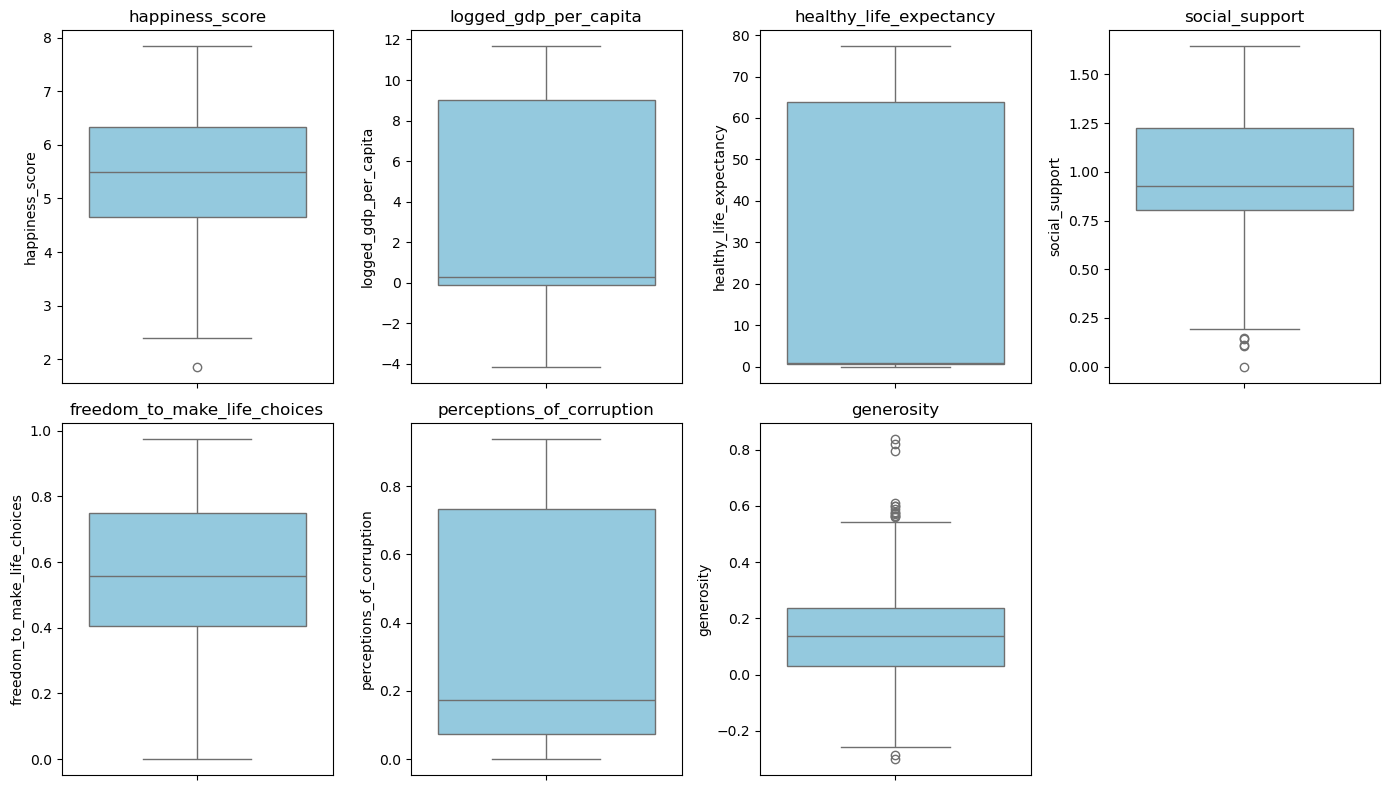

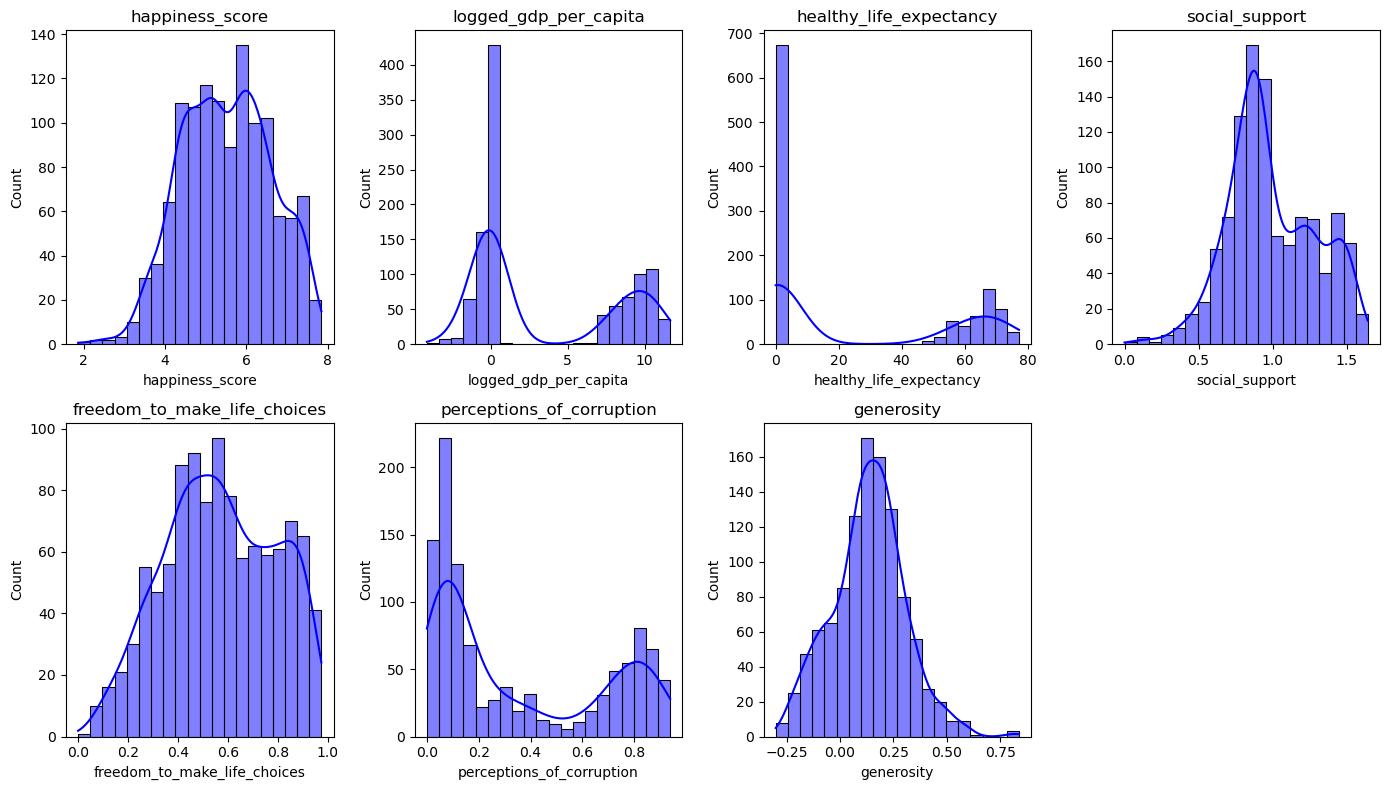

In [85]:
# Define key values
key_values = [
    "happiness_score", "logged_gdp_per_capita", "healthy_life_expectancy", 
    "social_support", "freedom_to_make_life_choices", 
    "perceptions_of_corruption", "generosity"
]

# Set figure size
plt.figure(figsize=(14, 8))

# Create subplots for Boxplots
for i, column in enumerate(key_values, 1):
    plt.subplot(2, 4, i)  # Arrange in a 2-row grid
    sns.boxplot(y=merged_report[column], color="skyblue")
    plt.title(column)

plt.tight_layout()
plt.show()

# Set figure size for Histograms
plt.figure(figsize=(14, 8))

# Create subplots for Histograms
for i, column in enumerate(key_values, 1):
    plt.subplot(2, 4, i)  
    sns.histplot(merged_report[column], kde=True, bins=20, color="blue")
    plt.title(column)

plt.tight_layout()
plt.show()

#### Observaions
##### Boxplots
##### * Happiness Score: Most values are clustered between 4 and 7, with a few low outliers.
##### * Logged GDP per Capita: Appears to have extreme values, including negative ones, indicating possible data quality issues.
##### * Healthy Life Expectancy: A wide range from near zero to around 77.
##### * Social Support: Most values are concentrated around 1, with a few low outliers.
##### * Freedom to Make Life Choices: Fairly spread out, with some countries having very low scores.
##### * Perceptions of Corruption: Skewed towards lower values (high corruption perception), with a few high values.
##### * Generosity: Some negative values, suggesting potential data anomalies.

##### Histograms
##### * Happiness Score: Nearly normal distribution, slightly skewed to the left.
##### * Logged GDP per Capita: Shows two peaks (bimodal), possibly due to differences between developed and developing countries.
##### * Healthy Life Expectancy: Large concentration at zero, likely due to missing or misclassified data.
##### * Social Support & Freedom: Right-skewed, meaning many countries report lower values.
##### * Perceptions of Corruption: Bimodal, indicating two groups of countries—some with high perceived corruption, others with low.
##### * Generosity: Close to normal distribution but slightly right-skewed.

##### Key Takeaways
##### * Outliers & Data Issues: Logged GDP per capita and healthy life expectancy contain problematic values (negative or zero).
##### * Skewed Distributions: Several factors, like corruption and freedom, are not normally distributed.
##### * Potential Insights: There might be clear groupings in GDP, corruption, and happiness levels, suggesting further clustering analysis could be insightful.

### 3. Data Unserstanding
#### d. Correlation Analysis: Explore

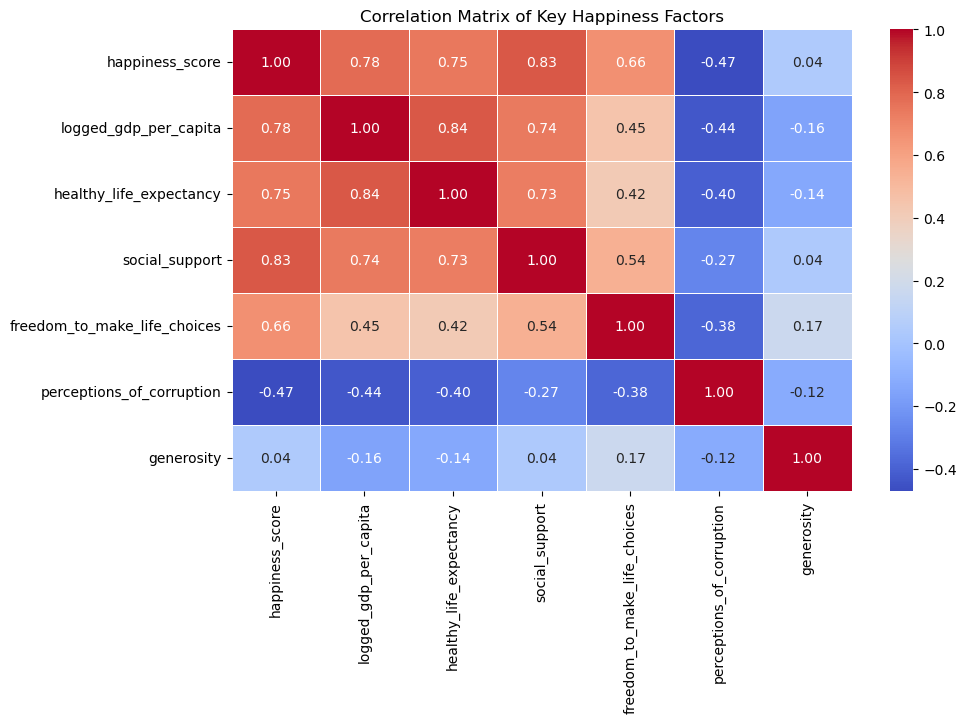

In [90]:
# Select key factors
key_values = [
    "happiness_score", "logged_gdp_per_capita", "healthy_life_expectancy",
    "social_support", "freedom_to_make_life_choices", "perceptions_of_corruption", "generosity"
]

# Compute correlation matrix
corr_matrix = df[key_values].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Happiness Factors")
plt.show()


#### Observations:
##### Strongest Positive Correlations:
##### * Happiness Score & Social Support (0.83): Countries with higher social support tend to have higher happiness scores.
##### * Happiness Score & Logged GDP per Capita (0.78): Economic prosperity is closely linked to happiness.
##### * Logged GDP per Capita & Healthy Life Expectancy (0.84): Wealthier nations tend to have better healthcare systems and longer life expectancies.
##### * Healthy Life Expectancy & Social Support (0.73): Strong social support networks correlate with better health outcomes.

##### Moderate Positive Correlations:
##### * Happiness Score & Healthy Life Expectancy (0.75): Better health is associated with higher happiness levels.
##### * Freedom to Make Life Choices & Happiness Score (0.66): People who feel more autonomous in their decisions are generally happier.

##### Negative Correlations:
##### * Perceptions of Corruption & Happiness Score (-0.47): Higher corruption levels correlate with lower happiness.
##### * Perceptions of Corruption & GDP per Capita (-0.44): More corrupt countries tend to have weaker economies.
##### * Perceptions of Corruption & Social Support (-0.27): Corrupt societies may experience weaker community ties.

##### Weak or No Correlation:
##### * Generosity & Happiness Score (0.04): Generosity does not seem to have a strong direct relationship with happiness.
##### * Generosity & Social Support (0.04): Weak correlation suggests generosity and social support are independent factors.

#### Insights:
##### * Economic indicators (GDP, life expectancy, social support) play a crucial role in happiness.
##### * Corruption negatively affects happiness and economic strength.
##### * Freedom to make choices significantly impacts well-being.
##### * Generosity does not have a clear relationship with happiness.


In [95]:
# Save the merged_report
merged_report.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_report.csv'))